In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv(r"C:\Users\Thund\NSS_Data_Analytics\Projects\Python\gdp-and-internet-usage-Daniel-Hoover\Data\gdp_percapita.csv")

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


There are 7662 rows. The data types are floats, integers, and objects

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [5]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [6]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [7]:
countrycount = gdp_df.groupby('Country')['Country'].count()
country = gdp_df.groupby('Country')
years = country['Year'].count()
not_all = years[years != 33]
print(not_all)
print(not_all.shape)
print(countrycount.shape)

Country
Afghanistan                  20
Aruba                        32
Bhutan                       32
Bosnia and Herzegovina       29
Cambodia                     30
Cayman Islands               16
Croatia                      28
CuraÃ§ao                     22
Djibouti                     10
Estonia                      28
Hungary                      32
Iceland                      28
Israel                       28
Kosovo                       15
Kuwait                       31
Latvia                       28
Lebanon                      32
Liberia                      23
Libya                        24
Lithuania                    28
Maldives                     28
Moldova                      28
Montenegro                   26
Nauru                        19
Other small states           23
Palau                        22
Qatar                        23
San Marino                   25
Serbia                       28
Sint Maarten (Dutch part)    14
Slovak Republic              31


There are 40 countries with incomplete data, and 202 countries with complete data.

In [8]:
gdp_years = gdp_df['Year'].value_counts()
sort_years = gdp_years.sort_values()
sort_years.to_frame()

,count
Year,
1990,207
1991,208
1992,210
1993,211
1994,213
1995,223
1996,223
1997,226
1998,226


The number of observations per year increased steadily before leveling out in 2013 and began a slight decline with 2022.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [9]:
gdp2020 = gdp_df[gdp_df['Year'] == 2020]
#checking that it is correctly pulled
print(gdp2020)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]


Text(0, 0.5, 'Countries')

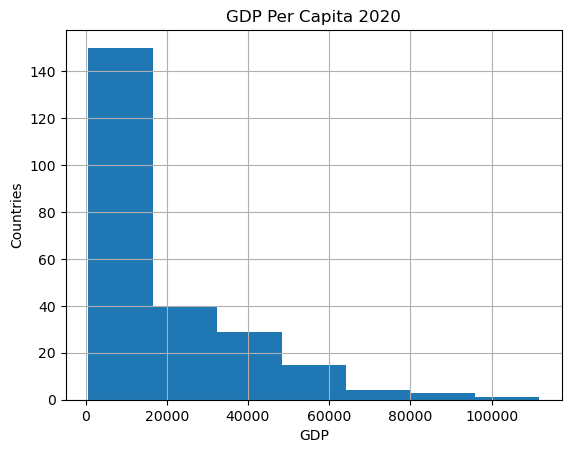

In [10]:
gdp2020['GDP_Per_Capita'].hist(bins=7)
plt.title('GDP Per Capita 2020')
plt.xlabel('GDP')
plt.ylabel('Countries')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

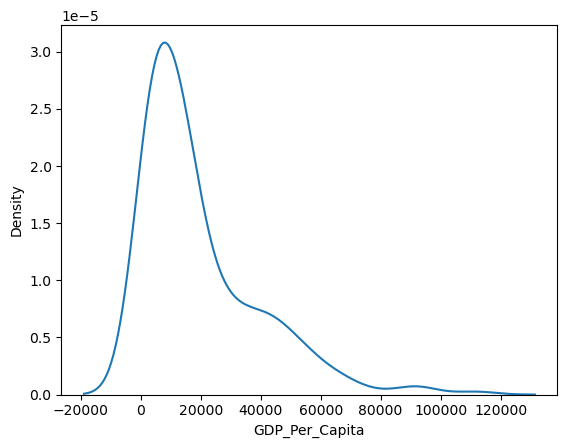

In [11]:
sns.kdeplot(gdp2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

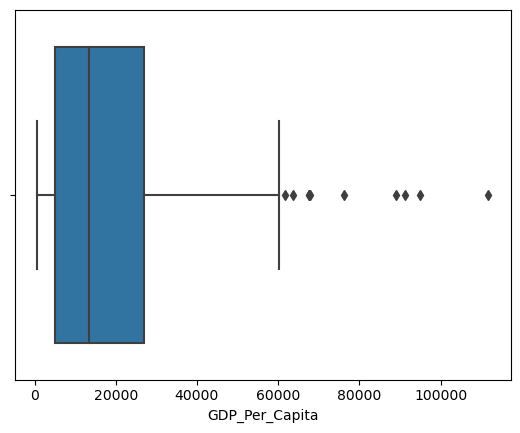

In [12]:
sns.boxplot(x=gdp2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

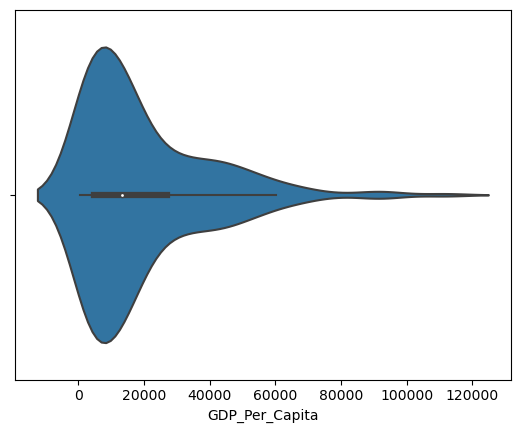

In [13]:
sns.violinplot(x=gdp2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [14]:
median2020=gdp2020['GDP_Per_Capita'].median()
print(median2020)

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [15]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

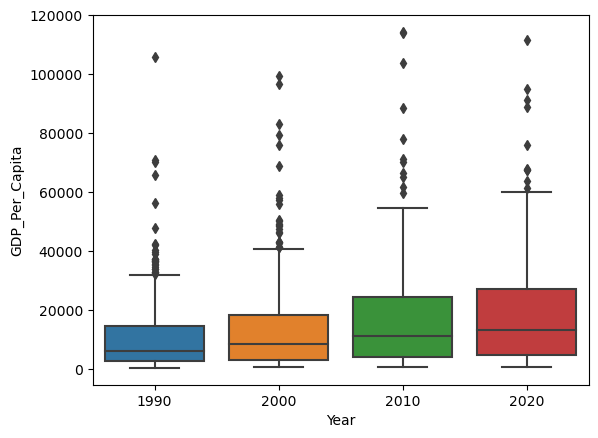

In [16]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

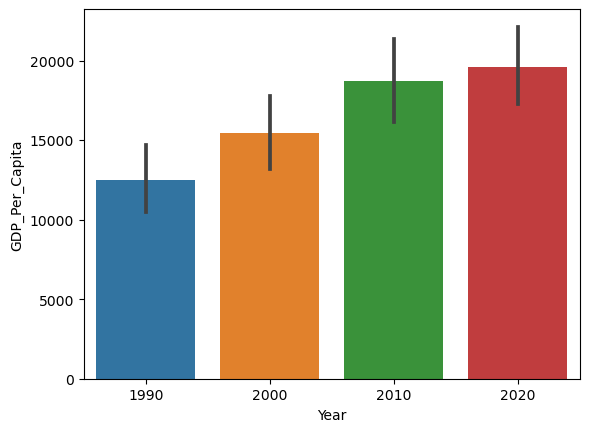

In [17]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

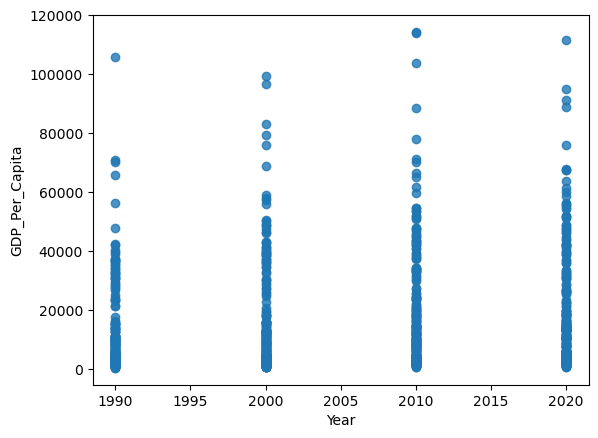

In [18]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

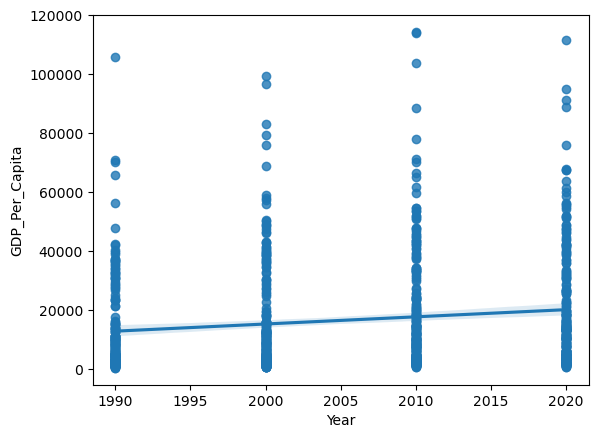

In [19]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

In [20]:
tenk = gdp_df[gdp_df['GDP_Per_Capita']>100000]
first100k = tenk.groupby('Country')['Year'].min()
print(first100k)

Country
Ireland                 2021
Luxembourg              2001
Macao SAR, China        2010
Qatar                   2010
Singapore               2021
United Arab Emirates    1990
Name: Year, dtype: int64


UAE had a gdp over $100,000 in 1990

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [21]:
y2020 = gdp_df[gdp_df['Year'] == 2020] # selecting just the year
maxgdp = y2020.groupby('Country')['GDP_Per_Capita'].agg(max).sort_values(ascending =False) # finding the max for that year
#print(maxgdp)
maxgdp


Country
Luxembourg                  111751.314751
Singapore                    94910.101431
Ireland                      91356.855054
Qatar                        89019.069857
Bermuda                      76117.804744
                                ...      
Niger                         1214.546556
Somalia                       1127.418534
Dem. Rep. Congo               1044.071214
Central African Republic       847.765012
Burundi                        711.355263
Name: GDP_Per_Capita, Length: 242, dtype: float64

In [22]:
#this will locate the MAX country and GDP 
max_y2020 = y2020.loc[y2020['GDP_Per_Capita']==y2020['GDP_Per_Capita'].max()]
max_y2020

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


Luxembourg had the highest gdp in 2020. 

         Country  Year  GDP_Per_Capita
4146  Luxembourg  2022   115541.774828
4147  Luxembourg  2021   115683.493708
4148  Luxembourg  2020   111751.314751
4149  Luxembourg  2019   114542.496934
4150  Luxembourg  2018   114164.468558


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

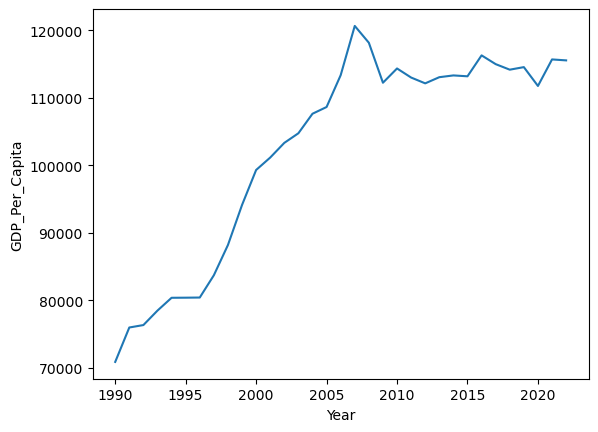

In [23]:
luxgdp = gdp_df[gdp_df['Country'] == 'Luxembourg']
print(luxgdp.head())
sns.lineplot(luxgdp, x=luxgdp['Year'], y=luxgdp['GDP_Per_Capita'] )

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [24]:
y2020 = gdp_df[gdp_df['Year'] == 2020] # selecting just the year
maxgdp = y2020.groupby('Country')['GDP_Per_Capita'].agg(min).sort_values(ascending =True) # finding the max for that year
print(maxgdp)


Country
Burundi                        711.355263
Central African Republic       847.765012
Dem. Rep. Congo               1044.071214
Somalia                       1127.418534
Niger                         1214.546556
                                ...      
Bermuda                      76117.804744
Qatar                        89019.069857
Ireland                      91356.855054
Singapore                    94910.101431
Luxembourg                  111751.314751
Name: GDP_Per_Capita, Length: 242, dtype: float64


Burundi had the lowest gdp in 2020

     Country  Year  GDP_Per_Capita
971  Burundi  2022      708.178317
972  Burundi  2021      714.066712
973  Burundi  2020      711.355263
974  Burundi  2019      729.658463
975  Burundi  2018      740.448223


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

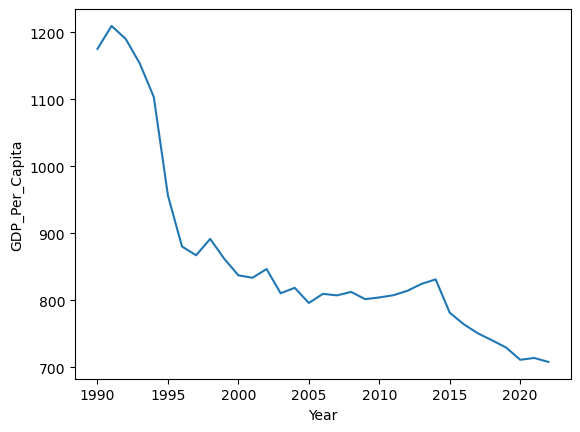

In [25]:
luxgdp = gdp_df[gdp_df['Country'] == 'Burundi']
print(luxgdp.head())
sns.lineplot(luxgdp, x=luxgdp['Year'], y=luxgdp['GDP_Per_Capita'] )

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [26]:
internet_df = pd.read_csv(r"C:\Users\Thund\NSS_Data_Analytics\Projects\Python\gdp-and-internet-usage-Daniel-Hoover\Data\internet_use.csv", nrows = 4495)
#internet_df = pd.read_csv(r"C:\Users\Thund\NSS_Data_Analytics\Projects\Python\gdp-and-internet-usage-Daniel-Hoover\Data\internet_use.csv", on_bad_lines='skip')
#internet_df = internet_df['Value'].dropna(axis=0, how='any') #This tells where the data stops. So you can callthe correct rows.
internet_df
#print(internet_df.info)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [27]:
internet_df = internet_df.drop('Value Footnotes', axis= 1)

In [28]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [29]:
internet_df = internet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

In [30]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

In [31]:
numyears = internet_df.groupby('Year')['Year'].count()
print(numyears)

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Year, dtype: int64


The data for internet users is much smaller than the GDP data set. The earliest year is 1960 and the latest is 2014. There is also a 5 year increment until 1975 when the data set begins counting every year.

17. What is the first year to have a non-zero internet users percentage value?

In [32]:
nonzero = internet_df.groupby('Year')['Internet_Users_Pct'].sum()
nonzero

Year
1960       0.000000
1965       0.000000
1970       0.000000
1975       0.000000
1976       0.000000
1977       0.000000
1978       0.000000
1979       0.000000
1980       0.000000
1981       0.000000
1982       0.000000
1983       0.000000
1984       0.000000
1985       0.000000
1986       0.000000
1987       0.000000
1988       0.000000
1989       0.000000
1990       5.032933
1991      10.931876
1992      19.951850
1993      30.144702
1994      60.571026
1995     131.726726
1996     253.150223
1997     454.897179
1998     750.253424
1999    1172.587525
2000    1768.346984
2001    2198.771961
2002    2813.872118
2003    3250.897681
2004    3794.284115
2005    4278.601987
2006    4783.780564
2007    5290.186501
2008    5814.472583
2009    6338.399306
2010    6959.455800
2011    7779.505598
2012    8191.847053
2013    8654.211824
2014    9140.469980
Name: Internet_Users_Pct, dtype: float64

1990 was the first year with a percent higher than 0%. 

18. How does the distribution of internet users percent differ for 2000 and 2014?

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

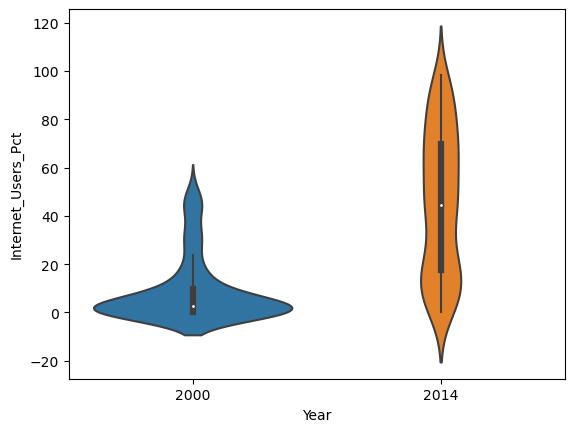

In [33]:
twok = internet_df[internet_df['Year'].isin([2000, 2014])]
sns.violinplot(x = twok['Year'], y=twok['Internet_Users_Pct'])

In 2000 there was still a large number of countries with very low internet usage. By 2014 there was a wider range of usage across the countries listed.

19. For how many countries was the percentage of internet users below 5% in 2014?

In [34]:
k14 = internet_df[internet_df['Year'] == 2014]
below5 = k14[k14['Internet_Users_Pct'] < 5]
print(below5)
print(below5.count())


                                 Country  Year  Internet_Users_Pct
623                              Burundi  2014                1.38
762                 Central African Rep.  2014                4.03
782                                 Chad  2014                2.50
909   Congo (Democratic Republic of the)  2014                3.00
1065         Dem. People's Rep. of Korea  2014                0.00
1256                             Eritrea  2014                0.99
1299                            Ethiopia  2014                2.90
1720                              Guinea  2014                1.72
1742                       Guinea-Bissau  2014                3.32
2453                          Madagascar  2014                3.70
2814                             Myanmar  2014                2.10
2975                               Niger  2014                1.95
3533                        Sierra Leone  2014                2.10
3648                             Somalia  2014                

There were 16 countries with an internet usage percent below 5% in 2014. 

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [35]:
gdp_df.info

<bound method DataFrame.info of           Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]>

In [36]:
internet_df.info

<bound method DataFrame.info of           Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]>

In [37]:
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Yemen,1999,NaN,0.056629
8732,Yemen,1998,NaN,0.023323
8733,Yemen,1997,NaN,0.015025
8734,Yemen,1996,NaN,0.000621


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [38]:
k14 =gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
sort_k14 = k14.sort_values('Internet_Users_Pct', ascending=False)
print(sort_k14)
top_3 = gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway' ])]
top_3

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
2993                   Iceland  2014    50450.741612               98.16
687                    Bermuda  2014    77361.104881               96.80
5212                    Norway  2014    62838.515727               96.30
1669                   Denmark  2014    52048.335493               95.99
7665                   Andorra  2014             NaN               95.90
...                        ...   ...             ...                 ...
7167  Turks and Caicos Islands  2014    24661.145053                 NaN
7179                    Tuvalu  2014     3521.328676                 NaN
7377       Upper middle income  2014    14063.487284                 NaN
7542        West Bank and Gaza  2014     5967.073437                 NaN
7571                     World  2014    15120.730322                 NaN

[281 rows x 4 columns]


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
679,Bermuda,2022,81165.650944,NaN
680,Bermuda,2021,78570.489515,NaN
681,Bermuda,2020,76117.804744,NaN
682,Bermuda,2019,81681.726668,NaN
683,Bermuda,2018,81423.408453,NaN
...,...,...,...,...
8172,Iceland,1994,NaN,6.794812
8173,Iceland,1993,NaN,2.667825
8174,Iceland,1992,NaN,1.539160
8175,Iceland,1991,NaN,0.505129


In [39]:
#this will locate the MAX country and GDP 
max_y2020 = y2020.loc[y2020['GDP_Per_Capita']==y2020['GDP_Per_Capita'].max()]
max_y2020

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


C:\Users\Thund\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


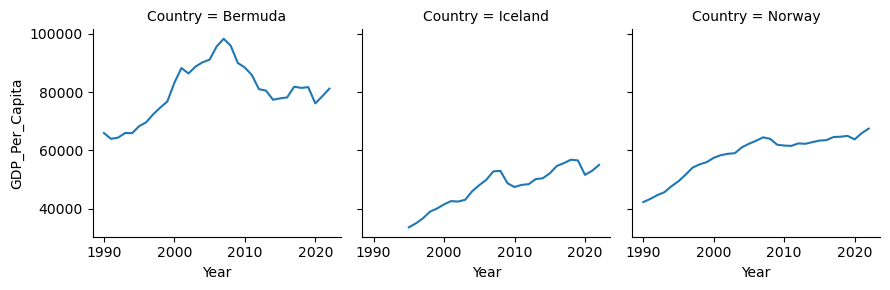

In [40]:
top = sns.FacetGrid(top_3, col='Country')
top.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [41]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

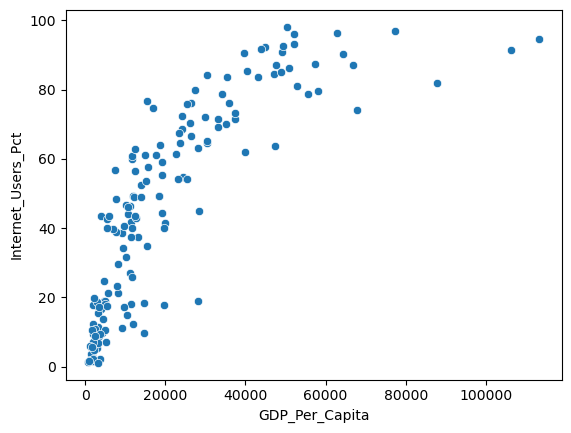

In [42]:
sns.scatterplot(gdp_and_internet_use_2014, x='GDP_Per_Capita', y='Internet_Users_Pct')

In [43]:
maxgdp = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_Per_Capita']==gdp_and_internet_use_2014['GDP_Per_Capita'].max()]
maxgdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4187,"Macao SAR, China",2014,151616.402364,NaN


24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [44]:
GDP_Group = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3 , labels= ['Low', 'Medium', 'High'])
#print(GDP_Group)
gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3 , labels= ['Low', 'Medium', 'High'])
gdp_and_internet_use_2014


C:\Users\Thund\AppData\Local\Temp\ipykernel_20772\121061836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3 , labels= ['Low', 'Medium', 'High'])


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Group
7,Afghanistan,2014,2144.449634,6.39,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
61,Africa Western and Central,2014,4146.994622,NaN,Low
94,Albania,2014,11586.817446,60.10,Medium
127,Algeria,2014,11561.259795,18.09,Medium
...,...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06,NaN
8647,Turkey,2014,NaN,51.04,NaN
8670,Venezuela,2014,NaN,57.00,NaN
8694,Virgin Islands (U.S.),2014,NaN,50.07,NaN


In [52]:
med_int = gdp_and_internet_use_2014.groupby('GDP_Group')['Internet_Users_Pct'].median()
med_in2 = med_int.to_frame()

,Internet_Users_Pct
GDP_Group,
Low,10.6
Medium,43.4
High,78.7


In [53]:
low = gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_Group"] =='Low']
lowmed = low['Internet_Users_Pct'].median()
medium = gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_Group"] =='Medium']
medmed = medium['Internet_Users_Pct'].median()
high = gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_Group"]=='High']
highmed= high['Internet_Users_Pct'].median()
meds = ['Low', lowmed, 'Medium', medmed, 'High' highmed]
print(lowmed)
print(medmed)
print(highmed)
print(meds)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1776255653.py, line 7)

<Axes: ylabel='Internet_Users_Pct'>

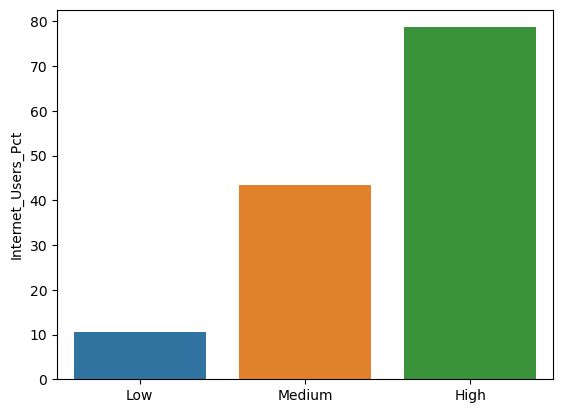

In [66]:
sns.barplot(gdp_and_internet_use_2014, x=['Low', 'Medium', 'High'], y =gdp_and_internet_use_2014.groupby('GDP_Group')['Internet_Users_Pct'].median())

